Kết nối Colab với Google Drive để lấy dữ liệu

In [1]:
!gdown 1xUzcRD1vjAVINBl-zpEw_smVih8TwZdJ

Downloading...
From: https://drive.google.com/uc?id=1xUzcRD1vjAVINBl-zpEw_smVih8TwZdJ
To: /content/emotion_ds.csv
100% 222k/222k [00:00<00:00, 87.8MB/s]


Cài đặt thư viện Gensim cho việc train model Word2Vec

In [2]:
!pip install gensim

Import các thư viện cần thiết

In [22]:
import os
import re
import pandas as pd
import string
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from scipy.spatial import distance

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Load tập dữ liệu từ thư mục trong Google Drive

In [6]:
# Load data
def load_data(csv_file):
    return pd.read_csv(csv_file, encoding="latin")

train_data = load_data("/content/emotion_ds.csv").iloc[:2000]

train_data = train_data["text"].to_list()
# train_data = "\n".join(train_data)

stopwords_list=stopwords.words('english')

def clean_data(w):
    w = w.lower()
    w = re.sub(r"'s\b","", w)
    w = re.sub("[^a-zA-Z]", " ", w)
    words = w.split()
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words)


def get_inp(list_sent):
    sent=list(map(clean_data, list_sent))
    sent=list(map(lambda x: x.split(" "), sent))
    return sent

# print(train_data[:1000])
inp_data=get_inp(train_data)
print(inp_data[:5])

[['seen', 'two', 'years', 'spending', 'sun', 'filled', 'day', 'aussie', 'open', 'followed', 'dumplings', 'chinatown', 'lemonade', 'leafy', 'beer', 'garden', 'feeling', 'like', 'stepped', 'back', 'time', 'labour', 'vain', 'brunswick', 'street', 'attending', 'backyard', 'barbecue', 'visiting', 'edinburgh', 'gardens', 'aussie', 'day'], ['like', 'add', 'slice', 'cheese', 'pepper', 'egg', 'feeling', 'naughty', 'like', 'add', 'chocolate', 'chips', 'trail', 'mix', 'another', 'treat', 'loving', 'pregnant', 'mom', 'often', 'craves', 'sweet', 'want', 'overload', 'sugar', 'empty', 'calories', 'zico', 'coconut', 'water', 'chocolate'], ['bunch', 'friends', 'grateful', 'squad', 'mates', 'teammates', 'theres', 'another', 'bunch', 'people', 'made', 'feel', 'worthless', 'everything', 'try', 'seems', 'forced', 'conversations', 'seems', 'like', 'forcing', 'words', 'everything', 'else'], ['also', 'feel', 'devoted', 'profession', 'get', 'ever', 'annoyed', 'see', 'things', 'would', 'adversely', 'bring', 'ad

Train model Word2Vec. Trong quá trình train, có bạn có thể chỉnh sử dụng GPU của Colab để đẩy nhanh tiến độ bằng cách vào Rumtime => Change Runtime Type và chọn GPU

In [10]:
# Skipgram model
model = Word2Vec(inp_data, min_count = 1, vector_size = 256, window = 5, sg = 1)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=1000)
model.wv.save('word2vec_skipgram.bin')


# CBOW model
model = Word2Vec(inp_data, min_count = 1, vector_size = 256, window = 5, sg = 0)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=1000)
model.wv.save('word2vec_CBOW.bin')


Sau khi có model. Ta tiến hành load mô hình

In [26]:
!gdown 1FrDtY64LLqW78VKfQ5crJEMNjtbEsmB0
!gdown 1BxCv9wspLYAMac86VdhaJjfQpGoM3eYV

Downloading...
From: https://drive.google.com/uc?id=1FrDtY64LLqW78VKfQ5crJEMNjtbEsmB0
To: /content/word2vec_CBOW.bin
100% 5.47M/5.47M [00:00<00:00, 25.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BxCv9wspLYAMac86VdhaJjfQpGoM3eYV
To: /content/word2vec_skipgram.bin
100% 5.47M/5.47M [00:00<00:00, 16.2MB/s]


In [ ]:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from scipy.spatial import distance
path = 'word2vec_CBOW.bin'
model = gensim.models.KeyedVectors.load(path)

In [13]:
with open("vocab.txt", "w", encoding="utf-8") as f:
    for x in list(model.wv.key_to_index.keys()):
        f.write(x + "\n")

Test kết quả

In [19]:
model.wv.most_similar(positive=['book'], topn=10)

[('heroine', 0.45189690589904785),
 ('peeta', 0.4516686499118805),
 ('gut', 0.4430809020996094),
 ('flirtiness', 0.4264783561229706),
 ('ending', 0.3618077337741852),
 ('labyrinth', 0.3553212583065033),
 ('books', 0.3413330614566803),
 ('david', 0.329668790102005),
 ('stayed', 0.3281995356082916),
 ('hadnt', 0.32703840732574463)]

In [23]:
word_0 = "write"
word_1 = "book"
word_2 = "happy"

word_0_eb = model.wv[word_0]
word_1_eb = model.wv[word_1]
word_2_eb = model.wv[word_2]

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

OUTPUT DISTANCE
0 vs 1:  32.376407623291016
1 vs 2:  32.41298294067383
2 vs 0:  28.467302322387695


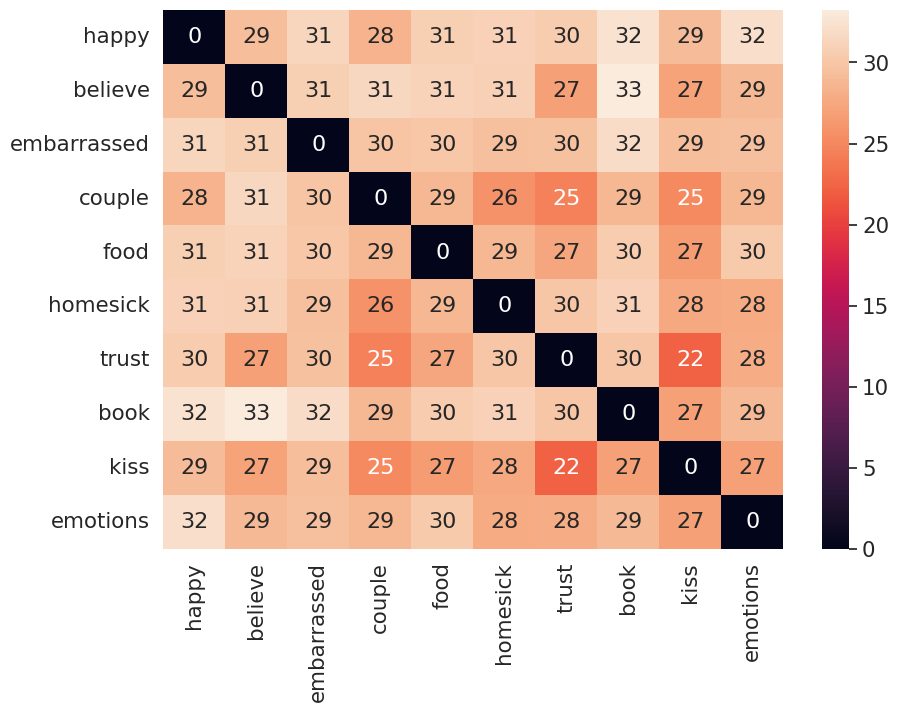

In [25]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["happy", "believe", "embarrassed", "couple", "food", "homesick", "trust", "book", "kiss", "emotions"]
list_word_embs = list(map(lambda x: model.wv[x], list_words))

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
